In [ ]:
# how often does a 20 beat a dealer with a 5 when dealer hits on soft 17
import pandas as pd
import blackjack_utils.game_config as gc
import blackjack_utils.shoe as shoe
import blackjack_utils.card as card
import random

# create a shoe with 6 decks
# deck = shoe.Shoe(6)
# player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(9, 0)]
# dealer_card_up = card.Card().from_ints(3, 0)
# deck.remove(player_cards[0])
# deck.remove(player_cards[1])
# deck.remove(dealer_card_up)
# game_config = gc.GameConfig(6, True, True, True, 1.5)
# results = []
# for i in range(100000):
#     deck_copy = shoe.Shoe(6)
#     deck_copy.cards = deck.cards.copy()
#     deck_copy.shuffle()
#     dealer_cards = [dealer_card_up, deck_copy.draw()]
#     result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
#     results.append(result)


In [3]:
# mean = sum(results) / len(results)
# print(mean) # 0.67191 - interpretation: expected value is + 0.67 - you profit 67% of your bet on average

In [4]:
# # now what happens when the player stays on 17 vs an 8
# deck = shoe.Shoe(6)
# player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(5, 0)]
# dealer_card_up = card.Card().from_ints(6, 0)
# deck.remove(player_cards[0])
# deck.remove(player_cards[1])
# deck.remove(dealer_card_up)
# game_config = gc.GameConfig(6, True, True, True, 1.5)
# results = []
# for i in range(100000):
#     deck_copy = shoe.Shoe(6)
#     deck_copy.cards = deck.cards.copy()
#     deck_copy.shuffle()
#     dealer_cards = [dealer_card_up, deck_copy.draw()]
#     result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
#     results.append(result)


In [5]:
# mean = sum(results) / len(results)
# print(mean) # -0.38408 - interpretation: expected value is -0.38408 - you lose 38% of your bet on average

In [6]:
# # gives a breakdown of the EV when a player stands on 17 vs different dealer cards
# data = pd.DataFrame(columns=['player_total', 'dealer_card_up', 'expected_value'])
# player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(5, 0)]

# game_config = gc.GameConfig(6, True, True, True, 1.5)
# for i in list(range(9)) + [12]:
#     dealer_card_up = card.Card().from_ints(i, 0)
#     deck = shoe.Shoe(6)
#     deck.remove(player_cards[0])
#     deck.remove(player_cards[1])
#     deck.remove(dealer_card_up)
#     results = []
#     for i in range(40000):
#         deck_copy = shoe.Shoe(6)
#         deck_copy.cards = deck.cards.copy()
#         deck_copy.shuffle()
#         dealer_cards = [dealer_card_up, deck_copy.draw()]
#         result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
#         results.append(result)

#     mean = sum(results) / len(results)
#     data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
# data

In [7]:
# # next up - use logic similar to the above to determine what the player should do in any given situation
# # start with player has 20 vs each possible dealer card up, analyze the options (hit, stay, double down)
# # with lower player totals, if a player hits, use the prescribed action after the hit for the new higher total
# # will have to do a second pass to figure out when to split and what to do with soft totals
# # this should give us the basic strategy table. check if it matches what the pros say

# # gives a breakdown of the EV when a player stands, hits, or doubles on hard 20 vs different dealer cards
# data = pd.DataFrame(columns=['player_total', 'action', 'dealer_card_up', 'expected_value'])
# player_cards = [card.Card().from_ints(11, 0), card.Card().from_ints(10, 0)]

# game_config = gc.GameConfig(6, True, True, True, 1.5)
# # stand 
# for i in list(range(9)) + [12]:
#     dealer_card_up = card.Card().from_ints(i, 0)
#     deck = shoe.Shoe(6)
#     deck.remove(player_cards[0])
#     deck.remove(player_cards[1])
#     deck.remove(dealer_card_up)
#     results = []
#     for i in range(40000):
#         deck_copy = shoe.Shoe(6)
#         deck_copy.cards = deck.cards.copy()
#         deck_copy.shuffle()
#         dealer_cards = [dealer_card_up, deck_copy.draw()]
#         result = game_config.evaluate(player_cards, dealer_cards, deck_copy)
#         results.append(result)

#     mean = sum(results) / len(results)
#     data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['stand'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
# # hit/double 
# for i in list(range(9)) + [12]:
#     dealer_card_up = card.Card().from_ints(i, 0)
#     deck = shoe.Shoe(6)
#     deck.remove(player_cards[0])
#     deck.remove(player_cards[1])
#     deck.remove(dealer_card_up)
#     results = []
#     results_double = []
#     for i in range(40000):
#         deck_copy = shoe.Shoe(6)
#         deck_copy.cards = deck.cards.copy()
#         deck_copy.shuffle()
#         dealer_cards = [dealer_card_up, deck_copy.draw()]
#         player_cards_copy = player_cards.copy()
#         player_cards_copy.append(deck_copy.draw())
#         result = game_config.evaluate(player_cards_copy, dealer_cards, deck_copy)
#         results.append(result)
#         results_double.append(result * 2)

#     mean = sum(results) / len(results)
#     mean_double = sum(results_double) / len(results_double)
#     data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['hit'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean]})], ignore_index=True)
#     data = pd.concat([data, pd.DataFrame({'player_total': [game_config.score_hand(player_cards)], 'action': ['double'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'expected_value': [mean_double]})], ignore_index=True)
# data.sort_values(by=['player_total', 'dealer_card_up', 'action'])

In [8]:
# data.to_csv('action_expected_values.csv')
data = pd.read_csv('action_expected_values.csv')

In [9]:
data['player_total'] = data['player_total'].astype(str)
data['dealer_card_up'] = data['dealer_card_up'].astype(str)
data_pivoted = data.pivot(index=['player_total', 'dealer_card_up'], columns='action', values='expected_value')
data_pivoted['player_total'] = data_pivoted.index.get_level_values(0)
data_pivoted['dealer_card_up'] = data_pivoted.index.get_level_values(1)
data_pivoted.reset_index(drop=True, inplace=True)
data_pivoted

action,double,hit,stand,player_total,dealer_card_up
0,-1.71045,-0.855225,0.434475,20,10
1,-1.75510,-0.877550,0.107125,20,11
2,-1.70630,-0.853150,0.633600,20,2
3,-1.70875,-0.854375,0.638300,20,3
4,-1.71330,-0.856650,0.651275,20,4
5,-1.69805,-0.849025,0.669850,20,5
6,-1.70505,-0.852525,0.676675,20,6
7,-1.68630,-0.843150,0.770050,20,7
8,-1.69890,-0.849450,0.788125,20,8
9,-1.69345,-0.846725,0.756425,20,9


In [10]:
def determine_best_action(row: pd.Series) -> pd.DataFrame:
    if row['double'] > row['hit'] and row['double'] > row['stand']:
        return 'double'
    elif row['hit'] > row['stand']:
        return 'hit'
    else:
        return 'stand'
    
def action_expected_values_to_best_action(data: pd.DataFrame) -> pd.DataFrame:
    data['player_total'] = data['player_total'].astype(str)
    data['dealer_card_up'] = data['dealer_card_up'].astype(str)
    data_pivoted = data.pivot(index=['player_total', 'dealer_card_up'], columns='action', values='expected_value')
    data_pivoted['player_total'] = data_pivoted.index.get_level_values(0)
    data_pivoted['dealer_card_up'] = data_pivoted.index.get_level_values(1)
    data_pivoted.reset_index(drop=True, inplace=True)
    data_pivoted['best_action'] = data_pivoted.apply(determine_best_action, axis=1)
    return data_pivoted

In [11]:
data = action_expected_values_to_best_action(data)

In [3]:
# enumerate the ways to make each hand with starting cards
from blackjack_utils.deck import Deck
from blackjack_utils.card import Card
combos = {}
for i in range(2, 22):
    combos[str(i)] = []
for i in range(12, 21):
    combos[f"soft_{i}"] = []
for i in range(2, 21, 2):
    combos[f'paired_{i}'] = []
deck_1 = Deck()
deck_2 = Deck()
for card_1 in deck_1.cards:
    for card_2 in deck_2.cards:
        total = card_1.get_card_value() + card_2.get_card_value()
        if total == 22:
            total = 12
        if card_1.get_card_value() == card_2.get_card_value():
            combos[f'paired_{total}'].append((card_1, card_2))
        if (card_1.get_card_value() == 11 or card_2.get_card_value() == 11) and total < 21:
            combos[f'soft_{total}'].append((card_1, card_2))
        else:
            combos[str(total)].append((card_1, card_2))
    

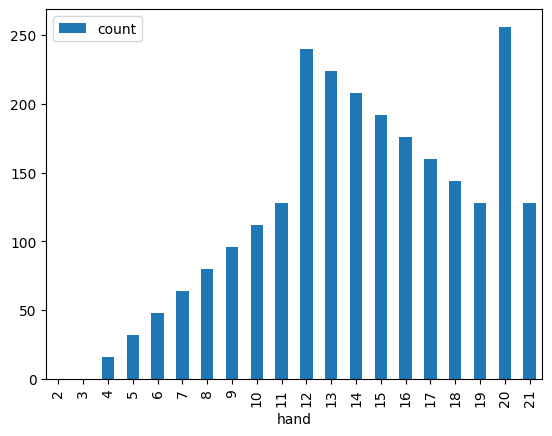

In [13]:
import matplotlib.pyplot as plt
#check out the number of ways to make each hand
hand_distributions = pd.DataFrame(columns=['hand', 'count'])

for i in range(2, 22):
    hand_distributions = pd.concat([hand_distributions, pd.DataFrame({'hand': [str(i)], 'count': [len(combos[str(i)])]})], ignore_index=True)
    
hand_distributions.plot.bar(x='hand', y='count')
plt.show()

In [14]:
combos

{'2': [],
 '3': [],
 '4': [(<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c9c30>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c9c30>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c8550>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c8550>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c9e40>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c9e40>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c86a0>),
  (<blackjack_utils.card.Card at 0x21d3e33b8e0>,
   <blackjack_utils.card.Card at 0x21d3e3c86a0>),
  (<blackjack_utils.card.Card at 0x21d3e3ca6b0>,
   <blackjack_utils.card.Card at 0x21d3e3c9c30>),
  (<blackjack_utils.card.Card at 0x21d3e3ca6b0>,
   <blackjack_utils.card.Card at 0x

In [15]:
data

action,double,hit,stand,player_total,dealer_card_up,best_action
0,-1.71045,-0.855225,0.434475,20,10,stand
1,-1.75510,-0.877550,0.107125,20,11,stand
2,-1.70630,-0.853150,0.633600,20,2,stand
3,-1.70875,-0.854375,0.638300,20,3,stand
4,-1.71330,-0.856650,0.651275,20,4,stand
5,-1.69805,-0.849025,0.669850,20,5,stand
6,-1.70505,-0.852525,0.676675,20,6,stand
7,-1.68630,-0.843150,0.770050,20,7,stand
8,-1.69890,-0.849450,0.788125,20,8,stand
9,-1.69345,-0.846725,0.756425,20,9,stand


In [4]:
from typing import List
def simulate_hand(game_config: gc.GameConfig, player_starting_cards: List[card.Card], dealer_card_up:card.Card, deck: shoe.Shoe, ev_actions: pd.DataFrame):
    """
        uses an EV action table like above to make a decision, then play through the hand
    """
    player_total = game_config.score_hand(player_starting_cards)
    # is_paired = player_starting_cards[0].get_card_value() == player_starting_cards[1].get_card_value()
    # is_soft = player_starting_cards[0].get_card_value() == 11 or player_starting_cards[1].get_card_value() == 11
    if player_total > 20:
        action = 'stand'
    else:
        try:
            action = ev_actions[(ev_actions['player_total'] == str(player_total)) & (ev_actions['dealer_card_up'] == str(dealer_card_up.get_card_value()))]['best_action'].iloc[0]
        except IndexError:
            action = 'stand'
            print(f"player_total: {player_total}, dealer_card_up: {dealer_card_up.get_card_value()}, ev_actions: {ev_actions}")
    outcome_multiplier = 1
    can_keep_hitting = True
    player_cards = player_starting_cards.copy()
    if action == 'hit':
        player_cards.append(deck.draw())
    elif action == 'double':
        outcome_multiplier = 2
        can_keep_hitting = False
        player_cards.append(deck.draw())
    elif action == 'stand':
        can_keep_hitting = False
    player_total = game_config.score_hand(player_cards)
    if player_total > 20:
        can_keep_hitting = False
    if can_keep_hitting:
        return simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_actions)
    return outcome_multiplier * game_config.evaluate(player_cards, [dealer_card_up, deck.draw()], deck)

In [ ]:
import random
# we've got the ev table for 20. we can make 3 separate ones that include the different options for 19, then call simulate_hand for each of those to get the different outcomes
ev_action_table = data
ev_action_table_stand = ev_action_table.copy()
ev_action_table_stand['best_action'] = 'stand'
ev_action_table_stand['player_total'] = '19'
ev_action_table_double = ev_action_table_stand.copy()
ev_action_table_stand = pd.concat([ev_action_table, ev_action_table_stand], ignore_index=True)
ev_action_table_double['best_action'] = 'double'
ev_action_table_hit = ev_action_table_double.copy()
ev_action_table_double = pd.concat([ev_action_table_double, ev_action_table], ignore_index=True)
ev_action_table_hit['best_action'] = 'hit'
ev_action_table_hit = pd.concat([ev_action_table_hit, ev_action_table], ignore_index=True)
combos_for_19 = combos['19']
game_config = gc.GameConfig(6, True, True, True, 1.5)
for dealer_card_rank in list(range(9)) + [12]:
    hit_total = 0
    double_total = 0
    stand_total = 0
    for i in range(40000):
        if i % 1000 == 0:
            print(f"dealer_card_rank: {dealer_card_rank}, i: {i}")
        deck = shoe.Shoe(6)
        deck.shuffle()
        player_cards = list(random.choice(combos_for_19))
        dealer_card_up = card.Card().from_ints(dealer_card_rank, 0)
        deck.remove(player_cards[0])
        deck.remove(player_cards[1])
        deck.remove(dealer_card_up)
        hit_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_hit)
        double_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_double)
        stand_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_stand)
    ev_action_table = pd.concat([ev_action_table, pd.DataFrame({'player_total': ['19'], 'dealer_card_up': [dealer_card_up.get_card_value()], 'double': [double_total/40000], 'hit': [hit_total/40000], 'stand': [stand_total/40000]})], ignore_index=True)
    

dealer_card_rank: 0, i: 0
dealer_card_rank: 0, i: 1000
dealer_card_rank: 0, i: 2000
dealer_card_rank: 0, i: 3000
dealer_card_rank: 0, i: 4000
dealer_card_rank: 0, i: 5000
dealer_card_rank: 0, i: 6000
dealer_card_rank: 0, i: 7000
dealer_card_rank: 0, i: 8000
dealer_card_rank: 0, i: 9000
dealer_card_rank: 0, i: 10000
dealer_card_rank: 0, i: 11000
dealer_card_rank: 0, i: 12000
dealer_card_rank: 0, i: 13000
dealer_card_rank: 0, i: 14000
dealer_card_rank: 0, i: 15000
dealer_card_rank: 0, i: 16000
dealer_card_rank: 0, i: 17000
dealer_card_rank: 0, i: 18000
dealer_card_rank: 0, i: 19000
dealer_card_rank: 0, i: 20000
dealer_card_rank: 0, i: 21000
dealer_card_rank: 0, i: 22000
dealer_card_rank: 0, i: 23000
dealer_card_rank: 0, i: 24000
dealer_card_rank: 0, i: 25000
dealer_card_rank: 0, i: 26000
dealer_card_rank: 0, i: 27000
dealer_card_rank: 0, i: 28000
dealer_card_rank: 0, i: 29000
dealer_card_rank: 0, i: 30000
dealer_card_rank: 0, i: 31000
dealer_card_rank: 0, i: 32000
dealer_card_rank: 0, i:

In [24]:
ev_action_table['best_action'] = ev_action_table.apply(determine_best_action, axis=1)

In [3]:
import pandas as pd
import blackjack_utils.game_config as gc
import blackjack_utils.shoe as shoe
import blackjack_utils.card as card
import random
#ev_action_table.to_csv('action_expected_values.csv', index=False)
ev_action_table = pd.read_csv('action_expected_values.csv')
ev_action_table['player_total'] = ev_action_table['player_total'].astype(str)
ev_action_table['dealer_card_up'] = ev_action_table['dealer_card_up'].astype(str)


In [5]:
import random
# now do it for 18-12
for player_amt in ['18', '17', '16', '15', '14', '13', '12']:
    ev_action_table_stand = ev_action_table.copy()
    ev_action_table_stand['best_action'] = 'stand'
    ev_action_table_stand['player_total'] = player_amt
    ev_action_table_stand.drop_duplicates(subset=['player_total', 'dealer_card_up'], inplace=True)
    ev_action_table_double = ev_action_table_stand.copy()
    ev_action_table_stand = pd.concat([ev_action_table, ev_action_table_stand], ignore_index=True)
    ev_action_table_double['best_action'] = 'double'
    ev_action_table_hit = ev_action_table_double.copy()
    ev_action_table_double = pd.concat([ev_action_table_double, ev_action_table], ignore_index=True)
    ev_action_table_hit['best_action'] = 'hit'
    ev_action_table_hit = pd.concat([ev_action_table_hit, ev_action_table], ignore_index=True)
    combos_for_19 = combos[player_amt]
    game_config = gc.GameConfig(6, True, True, True, 1.5)
    for dealer_card_rank in list(range(9)) + [12]:
        hit_total = 0
        double_total = 0
        stand_total = 0
        for i in range(40000):
            if i % 1000 == 0:
                print(f"dealer_card_rank: {dealer_card_rank}, i: {i}, player_total: {player_amt}")
            deck = shoe.Shoe(6)
            deck.shuffle()
            player_cards = list(random.choice(combos_for_19))
            dealer_card_up = card.Card().from_ints(dealer_card_rank, 0)
            deck.remove(player_cards[0])
            deck.remove(player_cards[1])
            deck.remove(dealer_card_up)
            hit_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_hit)
            double_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_double)
            stand_total += simulate_hand(game_config, player_cards, dealer_card_up, deck, ev_action_table_stand)
        ev_action_table = pd.concat([ev_action_table, pd.DataFrame({'player_total': [player_amt], 'dealer_card_up': [dealer_card_up.get_card_value()], 'double': [double_total/40000], 'hit': [hit_total/40000], 'stand': [stand_total/40000]})], ignore_index=True)
        ev_action_table['best_action'] = ev_action_table.apply(determine_best_action, axis=1)

NameError: name 'combos' is not defined